### Import libraries

In [1]:
from rdkit import Chem 
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole #RDKit drawing
from rdkit.Chem import Draw #RDKit drawing
# A few settings to improve the quality of structures (from Patrick Walters)
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True) # more consistent 2D layouts
from rdkit import DataStructs

### Two sample smiles of drugs

In [5]:
smile1 = 'CN1C(=O)CN=C(c2ccccc2)c3cc(Cl)ccc13'
smile2 = 'ClC1=CC2=C(C=C1)[N@]C(=O)CN=C2C3=CC=CC=C3[N+](=O)[O-]'
mol1 = Chem.MolFromSmiles(smile1)  # Diazepam
mol2 = Chem.MolFromSmiles(smile2) # Clonazepam

### molecular object of the two smiles

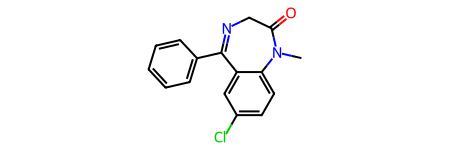

In [6]:
mol1

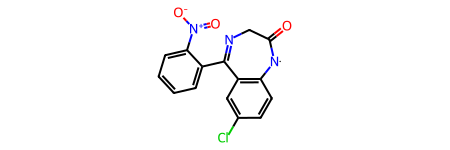

In [7]:
mol2

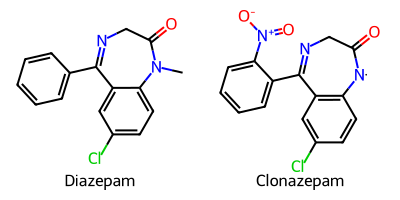

In [9]:
img = Draw.MolsToGridImage(
    [mol1, mol2],
    molsPerRow=2,
    subImgSize=(200, 200),
    legends=["Diazepam", "Clonazepam"]
)

img

### Morgan fingerprint Generator

#### radius = 2

In [42]:
morgan_fp = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048)

In [43]:
fp01 = morgan_fp.GetFingerprint(mol1)
fp02 = morgan_fp.GetFingerprint(mol2)

In [44]:

f1 = morgan_fp.GetCountFingerprint(mol1)
f1

In [45]:
type(f1)

rdkit.DataStructs.cDataStructs.UIntSparseIntVect

In [46]:
morgan_tanimoto12 = DataStructs.TanimotoSimilarity(fp01, fp02)

In [47]:
morgan_dice12 = DataStructs.DiceSimilarity(fp01, fp02)

In [48]:
print(f"Tanimoto Similarity: {morgan_tanimoto12:.4f}")
print(f"Dice Similarity: {morgan_dice12:.4f}")


Tanimoto Similarity: 0.3559
Dice Similarity: 0.5250


### Rdkit fingerprint Generator

In [49]:
rdkit_fp = rdFingerprintGenerator.GetRDKitFPGenerator(fpSize=2048)
fp01 = rdkit_fp.GetFingerprint(mol1)
fp02 = rdkit_fp.GetFingerprint(mol2)
rdkit_tanimoto12 = DataStructs.TanimotoSimilarity(fp01, fp02)
rdkit_dice12 = DataStructs.DiceSimilarity(fp01, fp02)
print(f"Tanimoto Similarity: {rdkit_tanimoto12:.4f}")
print(f"Dice Similarity: {rdkit_dice12:.4f}")

Tanimoto Similarity: 0.7459
Dice Similarity: 0.8545


### Atompair fingerprint generator


In [50]:
atp_fp = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=2048)
fp01 = atp_fp.GetFingerprint(mol1)
fp02 = atp_fp.GetFingerprint(mol2)
atomp_tanimoto12 = DataStructs.TanimotoSimilarity(fp01, fp02)
atomp_dice12 = DataStructs.DiceSimilarity(fp01, fp02)
print(f"Tanimoto Similarity: {atomp_tanimoto12:.4f}")
print(f"Dice Similarity: {atomp_dice12:.4f}")

Tanimoto Similarity: 0.5070
Dice Similarity: 0.6729


### Topological Torsion fingerprint Generator

In [41]:
tt_fp = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=2048)
fp01 = tt_fp.GetFingerprint(mol1)
fp02 = tt_fp.GetFingerprint(mol2)
topo_tanimoto12 = DataStructs.TanimotoSimilarity(fp01, fp02)
topo_dice12 = DataStructs.DiceSimilarity(fp01, fp02)
print(f"Tanimoto Similarity: {topo_tanimoto12:.4f}")
print(f"Dice Similarity: {topo_dice12:.4f}")

Tanimoto Similarity: 0.4464
Dice Similarity: 0.6173


In [35]:
import pandas as pd

In [53]:
similarity_data = {
    'Tanimoto': [morgan_tanimoto12, rdkit_tanimoto12, atomp_tanimoto12,topo_tanimoto12],
    'Dice': [morgan_dice12, rdkit_dice12, atomp_dice12,topo_dice12]
}

# four fingerprint types
fingerprint_types = ['MorganGenerator', 'RDKitFPGenerator', 'AtomPairGenerator','TopologicalTorsionGenerator']

df = pd.DataFrame(similarity_data, index=fingerprint_types)

In [54]:
df

,Tanimoto,Dice
MorganGenerator,0.355932,0.525000
RDKitFPGenerator,0.745946,0.854489
AtomPairGenerator,0.507042,0.672897
TopologicalTorsionGenerator,0.446429,0.617284
